In [ ]:
# importing base libraries
import numpy as np
import pandas as pd

# model libraries
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier, plot_tree


# visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

# metrics
from sklearn.metrics import accuracy_score, precision_score, plot_confusion_matrix

%matplotlib inline

In [ ]:
data = pd.read_csv('/content/Iris (1).csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Let's get a statistical summary of each column
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


*Above result shows there is no Null values in the dataset*

#Data Exploration

## Let's view the distribution of each column

Text(0, 0.5, 'Sepal Width')

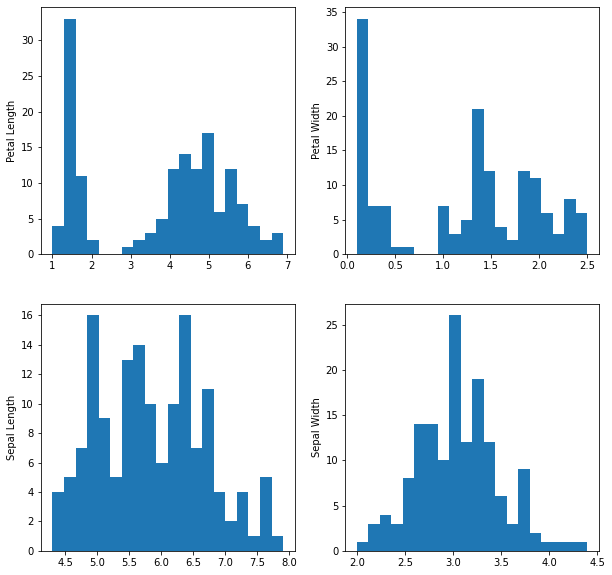

In [ ]:
# describe the figure size
fig = plt.figure(figsize=(10,10))

# Subplot 1
plt.subplot(2,2,1)
plt.hist(data['PetalLengthCm'],bins= 20)
plt.ylabel('Petal Length')

# Subplot 2
plt.subplot(2,2,2)
plt.hist(data['PetalWidthCm'],bins= 20)
plt.ylabel('Petal Width')

# Subplot 3
plt.subplot(2,2,3)
plt.hist(data['SepalLengthCm'],bins= 20)
plt.ylabel('Sepal Length')

# Subplot 4
plt.subplot(2,2,4)
plt.hist(data['SepalWidthCm'],bins= 20)
plt.ylabel('Sepal Width')

## Drawing a correlation heatmap

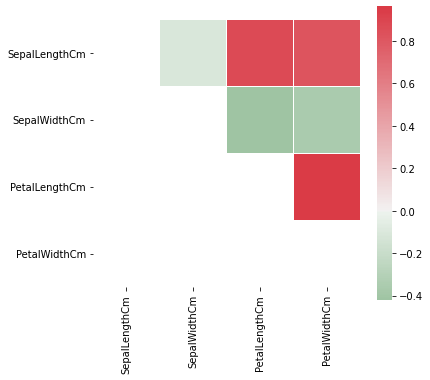

In [ ]:
# Computing the correlation matrix
corr = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species']].corr()

# Creating a  mask for in lower triangle
mask = np.tril(np.ones_like(corr, dtype=bool))

# describe the figure size
f, ax = plt.subplots(figsize=(6, 6))

# Creating a colour Map
cmap = sns.diverging_palette(130, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, 
            square = True, linewidths=.1, cbar_kws={"shrink": .9})

In [ ]:
# Let's view the correlation matrix
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


*From the above correlation matrix it can be inferred that all the columns are highly correlated and as such plays significant role in classifying the class.*

# Model Defination

## Decision Tree

In [ ]:

# Listing the features & target
features = data.iloc[:,1:-1]
target = data['Species']

# Dividing data in Test & Train
x_train, x_test, y_train, y_test = tts( features, target, test_size = 0.2, random_state = 1)

In [ ]:
# creating using decision tree
dtree = DecisionTreeClassifier(criterion= "entropy", max_depth= 3, random_state= 2)
# fitting the tree
dtree.fit(x_train, y_train)
# prediction
y_hat_dtree = dtree.predict(x_test)

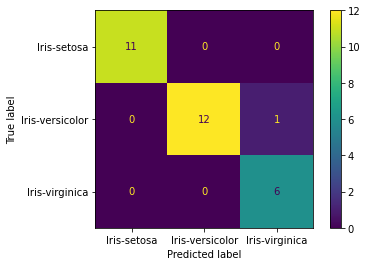

In [ ]:
# Let's view the confusion matrix
plot_confusion_matrix(dtree,x_test,y_test)

*We find that 29 out 30 class are correctly classified by the model*

In [ ]:
# geting the accuracy score
# creating a metrics dict
metrics_dict = {}

metrics_dict['accuracy'] = accuracy_score(y_true=y_test, y_pred= y_hat_dtree)
metrics_dict['precision'] = {'weighted': precision_score(y_true=y_test, y_pred=y_hat_dtree, average = 'weighted'),
                             'micro': precision_score(y_true=y_test, y_pred=y_hat_dtree, average = 'micro'),
                             'macro': precision_score(y_true=y_test, y_pred=y_hat_dtree, average = 'macro')
                             }

In [ ]:
metrics_dict

{'accuracy': 0.9666666666666667,
 'precision': {'macro': 0.9523809523809524,
  'micro': 0.9666666666666667,
  'weighted': 0.9714285714285714}}

*Metrics shows a good level of precision & accuracy* 

## Visualizing the decision Tree

[Text(209.25, 475.65000000000003, 'PetalWidthCm <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-virginica'),
 Text(139.5, 339.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(279.0, 339.75, 'PetalWidthCm <= 1.65\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-virginica'),
 Text(139.5, 203.85000000000002, 'PetalLengthCm <= 4.95\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(69.75, 67.94999999999999, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = Iris-versicolor'),
 Text(209.25, 67.94999999999999, 'entropy = 0.722\nsamples = 5\nvalue = [0, 1, 4]\nclass = Iris-virginica'),
 Text(418.5, 203.85000000000002, 'PetalLengthCm <= 4.85\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]\nclass = Iris-virginica'),
 Text(348.75, 67.94999999999999, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(488.25, 67.94999999999999, 'entropy = 0.0\nsam

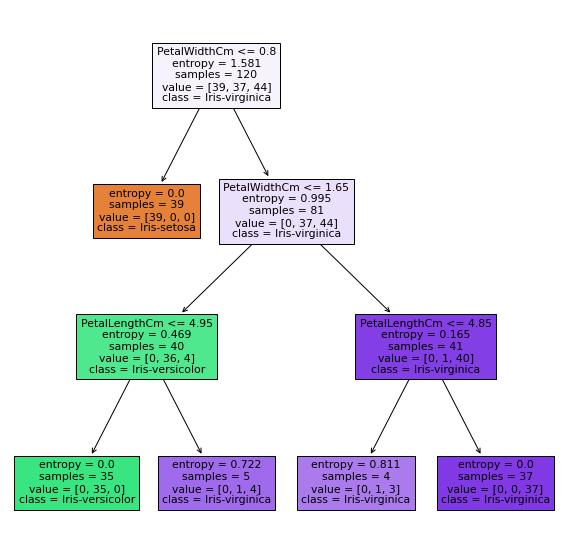

In [ ]:
# getting list feature names
feature_names=list(data.columns[1:-1])
# getting list of class names
class_names= list(target.unique())

# defining the plot
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))

# Plotting the decision tree
plot_tree(dtree, feature_names = feature_names, class_names= class_names,filled = True, precision= 3)

In [ ]:
# Saving the decision Tree
fig.savefig('/content/dtree.png')



---



